Any investor does not want to take risk and want to make max profit possible. Speaking of which, we have to say there is a tradeoff between those quantities. Research says one should not see risk and return as separate things. More risk you carry, more profit you should expect and much more you can make will be answers by Markowitz portfolio optimization (MPO).

- Given the portfolio (MPO) assign weights of each security
- it weights in a way that we get max profit with given amount of risk (everyone has different appetite for risk).

We shall try to assign weights to securities (Tesla, Google, Meta, Microsoft) to optimize the return based on the given risk. All this will be done using Markowitz Portfolio Optimization, aka Modern Port. Theory, invented by Harry Markowitz. We shall do all this using two approaches,

1. Monte Carlo simulation
2. Finding out minimal -- Using SciPy 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import plotly_express as px
import pandas_datareader as web
from datetime import datetime as dt, timedelta as td

# plt.rc\\\

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stockdetails/train_files
/kaggle/input/jpx-tokyo-stock-exchange-prediction/stock_list.csv
/kaggle/input/jpx-tokyo-stock-exchange-prediction/example_test_files/sample_submission.csv
/kaggle/input/jpx-tokyo-stock-exchange-prediction/example_test_files/options.csv
/kaggle/input/jpx-tokyo-stock-exchange-prediction/example_test_files/financials.csv
/kaggle/input/jpx-tokyo-stock-exchange-prediction/example_test_files/secondary_stock_prices.csv
/kaggle/input/jpx-tokyo-stock-exchange-prediction/example_test_files/trades.csv
/kaggle/input/jpx-tokyo-stock-exchange-prediction/example_test_files/stock_prices.csv
/kaggle/input/jpx-tokyo-stock-exchange-prediction/jpx_tokyo_market_prediction/competition.cpython-37m-x86_64-linux-gnu.so
/kaggle/input/jpx-tokyo-stock-exchange-prediction/jpx_tokyo_market_prediction/__init__.py
/kaggle/input/jpx-tokyo-stock-exchange-prediction/data_specifications/stock_fin_spec.csv
/kaggle/input/jpx-tokyo-stock-exchange-prediction/data_specifications/trades_

In [2]:
stocks_df=pd.read_csv("/kaggle/input/jpx-tokyo-stock-exchange-prediction/stock_list.csv")
stocks_df.dropna()

SecuritiesCode  EffectiveDate                        Name  \
0               1301       20211230            KYOKUYO CO.,LTD.   
19              1332       20211230   Nippon Suisan Kaisha,Ltd.   
20              1333       20211230  Maruha Nichiro Corporation   
26              1352       20211230          HOHSUI CORPORATION   
37              1375       20211230   YUKIGUNI MAITAKE CO.,LTD.   
...              ...            ...                         ...   
4411            9993       20211230           YAMAZAWA CO.,LTD.   
4412            9994       20211230          YAMAYA CORPORATION   
4413            9995       20211230             GLOSEL Co.,Ltd.   
4414            9996       20211230              Satoh&Co.,Ltd.   
4415            9997       20211230            BELLUNA CO.,LTD.   

                 Section/Products NewMarketSegment 33SectorCode  \
0        First Section (Domestic)     Prime Market           50   
19       First Section (Domestic)     Prime Market           50   
20       First Section (Domestic)     Prime Market           50   
26       First Section (Domestic)  Standard Market         6050   
37       First Section (Domestic)     Prime Market           50   
...                           ...              ...          ...   
4411     First Section (Domestic)  Standard Market         6100   
4412     First Section (Domestic)  Standard Market         6100   
4413     First Section (Domestic)     Prime Market         6050   
4414  JASDAQ(Standard / Domestic)  Standard Market         6050   
4415     First Section (Domestic)     Prime Market         6100   

                           33SectorName 17SectorCode  \
0     Fishery, Agriculture and Forestry            1   
19    Fishery, Agriculture and Forestry            1   
20    Fishery, Agriculture and Forestry            1   
26                      Wholesale Trade           13   
37    Fishery, Agriculture and Forestry            1   
...                                 ...          ...   
4411                       Retail Trade           14   
4412                       Retail Trade           14   
4413                    Wholesale Trade           13   
4414                    Wholesale Trade           13   
4415                       Retail Trade           14   

                       17SectorName NewIndexSeriesSizeCode NewIndexSeriesSize  \
0                            FOODS                       7      TOPIX Small 2   
19                           FOODS                       4       TOPIX Mid400   
20                           FOODS                       4       TOPIX Mid400   
26    COMMERCIAL & WHOLESALE TRADE                       7      TOPIX Small 2   
37                           FOODS                       6      TOPIX Small 1   
...                             ...                    ...                ...   
4411                  RETAIL TRADE                       7      TOPIX Small 2   
4412                  RETAIL TRADE                       7      TOPIX Small 2   
4413  COMMERCIAL & WHOLESALE TRADE                       7      TOPIX Small 2   
4414  COMMERCIAL & WHOLESALE TRADE                       -                  -   
4415                  RETAIL TRADE                       6      TOPIX Small 1   

       TradeDate   Close  IssuedShares  MarketCapitalization  Universe0  
0     20211230.0  3080.0    10928283.0          3.365911e+10       True  
19    20211230.0   543.0   312430277.0          1.696496e+11       True  
20    20211230.0  2405.0    52656910.0          1.266399e+11       True  
26    20211230.0   856.0     8379000.0          7.172424e+09      False  
37    20211230.0  1196.0    39910700.0          4.773320e+10       True  
...          ...     ...           ...                   ...        ...  
4411  20211230.0  1626.0    10960825.0          1.782230e+10       True  
4412  20211230.0  2447.0    10847870.0          2.654474e+10       True  
4413  20211230.0   410.0    26426800.0          1.083499e+10      False  
4414  2021

In [3]:
stock_history_df=pd.read_csv("/kaggle/input/jpx-tokyo-stock-exchange-prediction/supplemental_files/stock_prices.csv")
stock_history_df

RowId        Date  SecuritiesCode    Open    High     Low  \
0       20211206_1301  2021-12-06            1301  2982.0  2982.0  2965.0   
1       20211206_1332  2021-12-06            1332   592.0   599.0   588.0   
2       20211206_1333  2021-12-06            1333  2368.0  2388.0  2360.0   
3       20211206_1375  2021-12-06            1375  1230.0  1239.0  1224.0   
4       20211206_1376  2021-12-06            1376  1339.0  1372.0  1339.0   
...               ...         ...             ...     ...     ...     ...   
269876  20220624_9990  2022-06-24            9990   576.0   576.0   563.0   
269877  20220624_9991  2022-06-24            9991   810.0   815.0   804.0   
269878  20220624_9993  2022-06-24            9993  1548.0  1548.0  1497.0   
269879  20220624_9994  2022-06-24            9994  2507.0  2527.0  2498.0   
269880  20220624_9997  2022-06-24            9997   710.0   725.0   710.0   

         Close   Volume  AdjustmentFactor  ExpectedDividend  SupervisionFlag  \
0       2971.0     8900               1.0               NaN            False   
1        589.0  1360800               1.0               NaN            False   
2       2377.0   125900               1.0               NaN            False   
3       1224.0    81100               1.0               NaN            False   
4       1351.0     6200               1.0               NaN            False   
...        ...      ...               ...               ...              ...   
269876   564.0    24200               1.0               NaN            False   
269877   815.0     8700               1.0               NaN            False   
269878  1497.0    12600               1.0               NaN            False   
269879  2527.0     7300               1.0               NaN            False   
269880   719.0   139600               1.0               NaN            False   

          Target  
0      -0.003263  
1      -0.008993  
2      -0.009963  
3      -0.015032  
4       0.002867  
...          ...  
269876  0.027073  
269877  0.001220  
269878  0.001329  
269879  0.003185  
269880  0.015089  

[269881 rows x 12 columns]

In [4]:
#try merging the 2 datasets 

merged_df = pd.merge(stocks_df, stock_history_df , on='SecuritiesCode', how='inner')  # Use 'inner' join or 'outer' depending on your needs
print(merged_df)

        SecuritiesCode  EffectiveDate              Name  \
0                 1301       20211230  KYOKUYO CO.,LTD.   
1                 1301       20211230  KYOKUYO CO.,LTD.   
2                 1301       20211230  KYOKUYO CO.,LTD.   
3                 1301       20211230  KYOKUYO CO.,LTD.   
4                 1301       20211230  KYOKUYO CO.,LTD.   
...                ...            ...               ...   
269876            9997       20211230  BELLUNA CO.,LTD.   
269877            9997       20211230  BELLUNA CO.,LTD.   
269878            9997       20211230  BELLUNA CO.,LTD.   
269879            9997       20211230  BELLUNA CO.,LTD.   
269880            9997       20211230  BELLUNA CO.,LTD.   

                Section/Products NewMarketSegment 33SectorCode  \
0       First Section (Domestic)     Prime Market           50   
1       First Section (Domestic)     Prime Market           50   
2       First Section (Domestic)     Prime Market           50   
3       First Section (Dome

In [6]:
merged_df.set_index('Date', inplace=True)


KeyError: "None of ['Date'] are in the columns"

In [7]:
# Select only the desired columns: SecuritiesCode, Name, and Close (both from df1 and df2)
merged_df_selected = merged_df[['SecuritiesCode', 'Name', 'Close_y']]

# Rename the 'Close_x' and 'Close_y' columns to something more meaningful
merged_df_selected.rename(columns={'Close_y': 'Close (Trade)'}, inplace=True)

# Display the result
print(merged_df_selected)


            SecuritiesCode              Name  Close (Trade)
Date                                                       
2021-12-06            1301  KYOKUYO CO.,LTD.         2971.0
2021-12-07            1301  KYOKUYO CO.,LTD.         3065.0
2021-12-08            1301  KYOKUYO CO.,LTD.         3055.0
2021-12-09            1301  KYOKUYO CO.,LTD.         3085.0
2021-12-10            1301  KYOKUYO CO.,LTD.         3105.0
...                    ...               ...            ...
2022-06-20            9997  BELLUNA CO.,LTD.          687.0
2022-06-21            9997  BELLUNA CO.,LTD.          706.0
2022-06-22            9997  BELLUNA CO.,LTD.          707.0
2022-06-23            9997  BELLUNA CO.,LTD.          707.0
2022-06-24            9997  BELLUNA CO.,LTD.          719.0

[269881 rows x 3 columns]


/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [8]:
import pandas as pd

# Step 1: Create the pivot table
df = merged_df_selected.pivot_table(
    index='Date',  # Use EffectiveDate as index
    columns='Name',          # Use company Name as columns
    values='Close (Trade)',  # Fill the table with the Close (Trade) values
    aggfunc='last'           # If there are multiple rows for a date, keep the last one
)


# Display the reshaped dataframe
print(df)


Name        3-D Matrix,Ltd.  A&D Company,Limited  ABC-MART,INC.  \
Date                                                              
2021-12-06            341.0               1140.0         5230.0   
2021-12-07            334.0               1192.0         5330.0   
2021-12-08            347.0               1227.0         5410.0   
2021-12-09            360.0               1240.0         5390.0   
2021-12-10            323.0               1218.0         5290.0   
...                     ...                  ...            ...   
2022-06-20            289.0                860.0         5680.0   
2022-06-21            306.0                897.0         5640.0   
2022-06-22            303.0                870.0         5670.0   
2022-06-23            314.0                866.0         5770.0   
2022-06-24            322.0                886.0         5780.0   

Name        ABHOTEL CO.,LTD.  ACCESS CO.,LTD.  ACOM CO.,LTD.  ACSL Ltd.  \
Date                                                 

In [15]:
# Step 2: Normalize the closing prices by dividing each company's closing prices by the first value
normalized_df = df*100 / df.iloc[0]

# Step 3: Plot the normalized closing prices
plt.figure(figsize=(40, 20))

# Plot each company's normalized closing prices
for column in normalized_df.columns:
    plt.plot(normalized_df.index, normalized_df[column], label=column)

# Add title and labels
plt.title('Normalized Closing Prices of Companies Over Time')
plt.xlabel('Date')
plt.ylabel('Normalized Close Price')

# Display the legend
plt.legend(title="Company Names")

# Show the plot
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Glyph 12539 (\N{KATAKANA MIDDLE DOT}) missing from current font.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12539 (\N{KATAKANA MIDDLE DOT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


In [16]:
np.random.seed(1)
# Weight each security
weights = np.random.random((1998,1))
# normalize it, so that some is one
weights /= np.sum(weights)
print(f'Normalized Weights : {weights.flatten()}')

# We generally do log return instead of return
log_ret = np.log(df / df.shift(1))
log_ret

# Expected return (weighted sum of mean returns). Mult by 252 as we always do annual calculation and year has 252 business days
exp_ret = log_ret.mean().dot(weights)*252 
print(f'\nExpected return of the portfolio is % : {(exp_ret[0])*100}')

# Exp Volatility (Risk)
exp_vol = np.sqrt(weights.T.dot(252*log_ret.cov().dot(weights)))
print(f'\nVolatility of the portfolio %: {(exp_vol[0][0])*100}')

# Sharpe ratio
sr = exp_ret / exp_vol
print(f'\nSharpe ratio of the portfolio: {sr[0][0]}')

Normalized Weights : [4.09753283e-04 7.07769189e-04 1.12381257e-07 ... 4.39708042e-04
 1.80918201e-04 8.14287982e-04]

Expected return of the portfolio is % : -13.058802196496751

Volatility of the portfolio %: 19.128228534665702

Sharpe ratio of the portfolio: -0.682697938956059


In [2]:
pip install yfinance


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.7/104.7 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.2/948.2 kB 41.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 508.0/508.0 kB 39.1 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.8-py3-none-any.whl size=138965 sha256=686725413820c33c5fddea6ad8990c78f8b6c9bc93c0e6dcfdda643f64af2689
  Stored in directory: /root/.cache/pip/wheels/2d/8f/b5/28f0f41351420da5423424fc74e55219347e0bb0cbca09bb82
Successfully built peewee
  Attempting uninstall: pytz
    Found existing installation: pytz 2022.1
    Uninstalling pytz-2022.1:
      Successfully uninstalled pytz-2022.1
  Attempting uninstall: requests
    Found existing installation: requests 2.28.1
    Uninstalling requests-2.

In [30]:
#CHECKING FOR TOP 50 PENNY STOCKS. REAL-TIME MONITORING USING YAHOO FINANCE API 

import yfinance as yf
import pandas as pd
from datetime import datetime as dt, timedelta as td

# Set the start and end dates
end = dt.today() - td(days=1)  # Get data up until yesterday
start = end - td(days=2000)  # You can change the number of days to look back

# List of top 50 penny stock symbols (update this with actual list)
stocks = ['SNDL', 'BBIG', 'PINK', 'AMC', 'GME', 'NOK', 'GEVO', 'HCMC', 'PLTR', 'FUBO', 
          'ZNGA', 'TRK', 'ASTR', 'SPRT', 'CLSK', 'NAKD', 'ATOS', 'PBR', 'OGI', 'JAGX', 
          'CLOV', 'MARA', 'BITF', 'RIOT', 'SOLO', 'XELA', 'VYST', 'APDN', 'SRNE', 'CENX', 
          'HIMX', 'RMG', 'VRM', 'TIGR', 'HOOD', 'GHSI', 'PRTY', 'KOSS', 'WISH', 'QS', 
          'SAVA', 'BLIN', 'SBE', 'IQ', 'MULN', 'SFT', 'LMND', 'WKHS', 'PINS', 'SOGO']

# Fetch data using yfinance
df = yf.download(stocks, start=start, end=end)

# Display the first few rows of the dataframe (e.g., first 100 rows)
print(df.head(100))  # Show last 100 rows to monitor the most recent data


[*********************100%***********************]  50 of 50 completed

Price      Adj Close                                           ... Volume  \
Ticker          ASTR NAKD PRTY RMG SBE SFT SOGO SOLO SPRT TRK  ...   SPRT   
Date                                                           ...          
2019-07-18       NaN  NaN  NaN NaN NaN NaN  NaN  NaN  NaN NaN  ...    NaN   
2019-07-19       NaN  NaN  NaN NaN NaN NaN  NaN  NaN  NaN NaN  ...    NaN   
2019-07-22       NaN  NaN  NaN NaN NaN NaN  NaN  NaN  NaN NaN  ...    NaN   
2019-07-23       NaN  NaN  NaN NaN NaN NaN  NaN  NaN  NaN NaN  ...    NaN   
2019-07-24       NaN  NaN  NaN NaN NaN NaN  NaN  NaN  NaN NaN  ...    NaN   
...              ...  ...  ...  ..  ..  ..  ...  ...  ...  ..  ...    ...   
2019-12-02       NaN  NaN  NaN NaN NaN NaN  NaN  NaN  NaN NaN  ...    NaN   
2019-12-03       NaN  NaN  NaN NaN NaN NaN  NaN  NaN  NaN NaN  ...    NaN   
2019-12-04       NaN  NaN  NaN NaN NaN NaN  NaN  NaN  NaN NaN  ...    NaN   
2019-12-05       NaN  NaN  NaN NaN NaN NaN  NaN  NaN  NaN NaN  ...    NaN   

In [31]:
#As we see that the dataframe has a lot of NaN values we first take a subset of just close and eliminate those penny stocks
# remove multilevel
df.columns = ['_'.join(col) for col in df.columns]

# Just study adj close 
df = df.iloc[:,:50]

In [32]:
df

Adj Close_ASTR  Adj Close_NAKD  Adj Close_PRTY  Adj Close_RMG  \
Date                                                                        
2019-07-18             NaN             NaN             NaN            NaN   
2019-07-19             NaN             NaN             NaN            NaN   
2019-07-22             NaN             NaN             NaN            NaN   
2019-07-23             NaN             NaN             NaN            NaN   
2019-07-24             NaN             NaN             NaN            NaN   
...                    ...             ...             ...            ...   
2024-12-30             NaN             NaN             NaN            NaN   
2024-12-31             NaN             NaN             NaN            NaN   
2025-01-02             NaN             NaN             NaN            NaN   
2025-01-03             NaN             NaN             NaN            NaN   
2025-01-06             NaN             NaN             NaN            NaN   

            Adj Close_SBE  Adj Close_SFT  Adj Close_SOGO  Adj Close_SOLO  \
Date                                                                       
2019-07-18            NaN            NaN             NaN             NaN   
2019-07-19            NaN            NaN             NaN             NaN   
2019-07-22            NaN            NaN             NaN             NaN   
2019-07-23            NaN            NaN             NaN             NaN   
2019-07-24            NaN            NaN             NaN             NaN   
...                   ...            ...             ...             ...   
2024-12-30            NaN            NaN             NaN             NaN   
2024-12-31            NaN            NaN             NaN             NaN   
2025-01-02            NaN            NaN             NaN             NaN   
2025-01-03            NaN            NaN             NaN             NaN   
2025-01-06            NaN            NaN             NaN             NaN   

            Adj Close_SPRT  Adj Close_TRK  ...  Close_PINS  Close_PLTR  \
Date                                       ...                           
2019-07-18             NaN            NaN  ...   25.780001         NaN   
2019-07-19             NaN            NaN  ...   25.559999         NaN   
2019-07-22             NaN            NaN  ...   26.219999         NaN   
2019-07-23             NaN            NaN  ...   26.780001         NaN   
2019-07-24             NaN            NaN  ...   27.820000         NaN   
...                    ...            ...  ...         ...         ...   
2024-12-30             NaN            NaN  ...   29.150000   77.180000   
2024-12-31             NaN            NaN  ...   29.000000   75.629997   
2025-01-02             NaN            NaN  ...   30.580000   75.190002   
2025-01-03             NaN            NaN  ...   30.940001   79.889999   
2025-01-06             NaN            NaN  ...   32.410000   75.919998   

            Close_PRTY  Close_QS  Close_RIOT  Close_RMG  Close_SAVA  \
Date                                                                  
2019-07-18         NaN       NaN        2.05        NaN        1.35   
2019-07-19         NaN       NaN        1.98        NaN        1.34   
2019-07-22         NaN       NaN        1.95        NaN        1.36   
2019-07-23         NaN       NaN        2.02        NaN        1.38   
2019-07-24         NaN       NaN        1.97        NaN        1.39   
...                ...       ...         ...        ...         ...   
2024-12-30         NaN      5.49       10.50        NaN        2.40   
2024-12-31         NaN      5.19       10.21        NaN        2.36   
2025-01-02         NaN      5.54       10.46        NaN        2.75   
2025-01-03         NaN      6.00       12.34        NaN        2.89   
2025-01-06         NaN      6.58       12.89        NaN        2.94   

            Close_SBE  Close_SFT  Close_SNDL  
Date                                          
2019-07-18        NaN        NaN        

In [33]:

df = df.dropna()

# Show the cleaned DataFrame
print(df)


Empty DataFrame
Columns: [Adj Close_ASTR, Adj Close_NAKD, Adj Close_PRTY, Adj Close_RMG, Adj Close_SBE, Adj Close_SFT, Adj Close_SOGO, Adj Close_SOLO, Adj Close_SPRT, Adj Close_TRK, Adj Close_WISH, Adj Close_ZNGA, Close_AMC, Close_APDN, Close_ASTR, Close_ATOS, Close_BBIG, Close_BITF, Close_BLIN, Close_CENX, Close_CLOV, Close_CLSK, Close_FUBO, Close_GEVO, Close_GHSI, Close_GME, Close_HCMC, Close_HIMX, Close_HOOD, Close_IQ, Close_JAGX, Close_KOSS, Close_LMND, Close_MARA, Close_MULN, Close_NAKD, Close_NOK, Close_OGI, Close_PBR, Close_PINK, Close_PINS, Close_PLTR, Close_PRTY, Close_QS, Close_RIOT, Close_RMG, Close_SAVA, Close_SBE, Close_SFT, Close_SNDL]
Index: []

[0 rows x 50 columns]


In [4]:
import yfinance as yf
import pandas as pd
from datetime import datetime as dt, timedelta as td

# Set the start and end dates
end = dt.today()
start = end - td(days=2000)

# List of stock symbols
stocks = ['AMZN', 'TSLA', 'META', 'MSFT']

# Fetch data using yfinance
df = yf.download(stocks, start=start, end=end)

# Display the first few rows of the dataframe
print(df.head(100))


[*********************100%***********************]  4 of 4 completed


Price            Close                                           High  \
Ticker            AMZN        META        MSFT       TSLA        AMZN   
Date                                                                    
2019-07-19   98.225998  197.605179  130.059494  17.212000   99.800003   
2019-07-22   99.281502  201.550079  131.782547  17.045334   99.449997   
2019-07-23   99.724503  201.589951  132.601303  17.344667   99.889503   
2019-07-24  100.040497  203.881180  133.962601  17.658667  100.065002   
2019-07-25   98.691002  199.946228  133.458084  15.254667  100.059998   
...                ...         ...         ...        ...         ...   
2019-12-03   88.498001  198.063431  143.098709  22.413334   88.643501   
2019-12-04   88.034500  197.953827  143.616241  22.202000   89.454498   
2019-12-05   87.024002  198.601349  143.692886  22.024668   88.175003   
2019-12-06   87.580002  200.284927  145.437241  22.392668   87.720001   
2019-12-09   87.475502  200.573822  145.063446  22.

[*********************100%***********************]  503 of 503 completed


Price      Adj Close            Close                                        \
Ticker          BF.B BRK.B          A       AAPL       ABBV ABNB        ABT   
Date                                                                          
2019-07-19       NaN   NaN  66.108955  48.769592  54.515358  NaN  79.864685   
2019-07-22       NaN   NaN  66.484230  49.884171  54.085838  NaN  80.394142   
2019-07-23       NaN   NaN  67.254066  50.274162  53.871098  NaN  81.005737   
2019-07-24       NaN   NaN  66.955772  50.233234  53.656349  NaN  80.868805   
2019-07-25       NaN   NaN  67.215569  49.836025  53.020039  NaN  80.330231   

Price                                          ...  Volume                    \
Ticker           ACGL         ACN        ADBE  ...     WTW       WY     WYNN   
Date                                           ...                             
2019-07-19  37.580002  179.421661  306.869995  ...  402300  3064000   984100   
2019-07-22  37.419998  179.893524  308.549988  

In [6]:
end = dt.today()
start = end - td(days=2000)
stocks = 'AMZN TSLA META MSFT'.split()
df = web.get_data_yahoo(stocks, start, end)

AttributeError: 'NoneType' object has no attribute 'group'

In [6]:
# remove multilevel
df.columns = ['_'.join(col) for col in df.columns]

# Just study adj close 
df = df.iloc[:,:4]

In MPT, Close prices are the primary input because they represent the final consensus for a trading day and are essential for calculating returns.

In [7]:
df

C_l_o_s_e___A_M_Z_N  C_l_o_s_e___M_E_T_A  C_l_o_s_e___M_S_F_T  \
Date                                                                        
2019-07-19            98.225998           197.605179           130.059494   
2019-07-22            99.281502           201.550079           131.782547   
2019-07-23            99.724503           201.589951           132.601303   
2019-07-24           100.040497           203.881180           133.962601   
2019-07-25            98.691002           199.946228           133.458084   
...                         ...                  ...                  ...   
2024-12-31           219.389999           585.510010           421.500000   
2025-01-02           220.220001           599.239990           418.579987   
2025-01-03           224.190002           604.630005           423.350006   
2025-01-06           227.610001           630.200012           427.850006   
2025-01-07           222.110001           617.890015           422.369995   

            C_l_o_s_e___T_S_L_A  
Date                             
2019-07-19            17.212000  
2019-07-22            17.045334  
2019-07-23            17.344667  
2019-07-24            17.658667  
2019-07-25            15.254667  
...                         ...  
2024-12-31           403.839996  
2025-01-02           379.279999  
2025-01-03           410.440002  
2025-01-06           411.049988  
2025-01-07           394.359985  

[1377 rows x 4 columns]

In [14]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [10]:
df

C_l_o_s_e___A_M_Z_N  C_l_o_s_e___M_E_T_A  C_l_o_s_e___M_S_F_T  \
Date                                                                        
2019-07-19            98.225998           197.605179           130.059494   
2019-07-22            99.281502           201.550079           131.782547   
2019-07-23            99.724503           201.589951           132.601303   
2019-07-24           100.040497           203.881180           133.962601   
2019-07-25            98.691002           199.946228           133.458084   
...                         ...                  ...                  ...   
2024-12-31           219.389999           585.510010           421.500000   
2025-01-02           220.220001           599.239990           418.579987   
2025-01-03           224.190002           604.630005           423.350006   
2025-01-06           227.610001           630.200012           427.850006   
2025-01-07           222.110001           617.890015           422.369995   

            C_l_o_s_e___T_S_L_A  
Date                             
2019-07-19            17.212000  
2019-07-22            17.045334  
2019-07-23            17.344667  
2019-07-24            17.658667  
2019-07-25            15.254667  
...                         ...  
2024-12-31           403.839996  
2025-01-02           379.279999  
2025-01-03           410.440002  
2025-01-06           411.049988  
2025-01-07           394.359985  

[1377 rows x 4 columns]

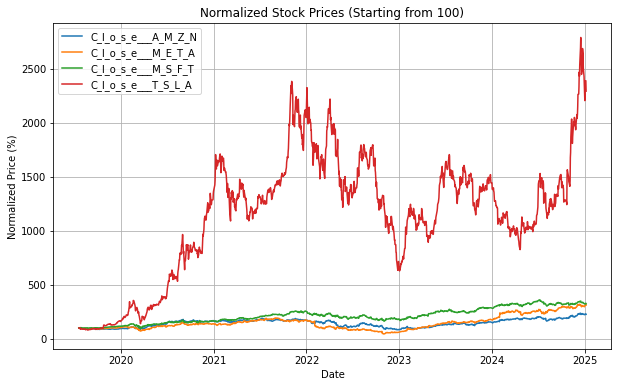

In [11]:
import matplotlib.pyplot as plt

# Normalize the data by dividing each stock price by its value on the first day
normalized_df = df * 100 / df.iloc[0]

# Plot the data
plt.figure(figsize=(10,6))
for column in normalized_df.columns:
    plt.plot(normalized_df.index, normalized_df[column], label=column)

plt.title("Normalized Stock Prices (Starting from 100)")
plt.xlabel("Date")
plt.ylabel("Normalized Price (%)")
plt.legend()
plt.grid(True)
plt.show()


TESLA DOING VOLATILE

In [12]:
#px.line(df * 100 / df.iloc[0])

In [12]:
ret_port = df.pct_change()
px.line(ret_port)

Looks like TSLA is having a jumpy ride, as you might have thought :)

In [17]:
np.random.seed(1)
# Weight each security
weights = np.random.random((1998,1))
# normalize it, so that some is one
weights /= np.sum(weights)
print(f'Normalized Weights : {weights.flatten()}')

# We generally do log return instead of return
log_ret = np.log(df / df.shift(1))
log_ret

# Expected return (weighted sum of mean returns). Mult by 252 as we always do annual calculation and year has 252 business days
exp_ret = log_ret.mean().dot(weights)*252 
print(f'\nExpected return of the portfolio is % : {(exp_ret[0])*100}')

# Exp Volatility (Risk)
exp_vol = np.sqrt(weights.T.dot(252*log_ret.cov().dot(weights)))
print(f'\nVolatility of the portfolio %: {(exp_vol[0][0])*100}')

# Sharpe ratio
sr = exp_ret / exp_vol
print(f'\nSharpe ratio of the portfolio: {sr[0][0]}')

Normalized Weights : [4.09753283e-04 7.07769189e-04 1.12381257e-07 ... 4.39708042e-04
 1.80918201e-04 8.14287982e-04]

Expected return of the portfolio is % : -13.058802196496751

Volatility of the portfolio %: 19.128228534665702

Sharpe ratio of the portfolio: -0.682697938956059


# Monte Carlo Simulation

We basically randomly initialize weights of the securities and check the returns vs risks. And among these set of weights we will find the one, for given risk, which gives the maximum return. However, one can do all this solving optimization problem, using SciPy. 

In [40]:
# number of simulation
n = 50_000
# n = 10

port_weights = np.zeros(shape=(n,len(df.columns)))
port_volatility = np.zeros(n)
port_sr = np.zeros(n)
port_return = np.zeros(n)

num_securities = len(df.columns)
# num_securities
for i in range(n):
    # Weight each security
    weights = np.random.random(4)
    # normalize it, so that some is one
    weights /= np.sum(weights)
    port_weights[i,:] = weights 
    #     print(f'Normalized Weights : {weights.flatten()}')

    # Expected return (weighted sum of mean returns). Mult by 252 as we always do annual calculation and year has 252 business days
    exp_ret = log_ret.mean().dot(weights)*252 
    port_return[i] = exp_ret
#     print(f'\nExpected return is : {exp_ret[0]}')

    # Exp Volatility (Risk)
    exp_vol = np.sqrt(weights.T.dot(252*log_ret.cov().dot(weights)))
    port_volatility[i] = exp_vol
#     print(f'\nVolatility : {exp_vol[0][0]}')

    # Sharpe ratio
    sr = exp_ret / exp_vol
    port_sr[i] = sr
#     print(f'\nSharpe ratio : {sr[0][0]}')

ValueError: could not broadcast input array from shape (4,) into shape (1998,)

In [16]:
# Index of max Sharpe Ratio
max_sr = port_sr.max()
ind = port_sr.argmax()
# Return and Volatility at Max SR
max_sr_ret = port_return[ind]
max_sr_vol = port_volatility[ind]


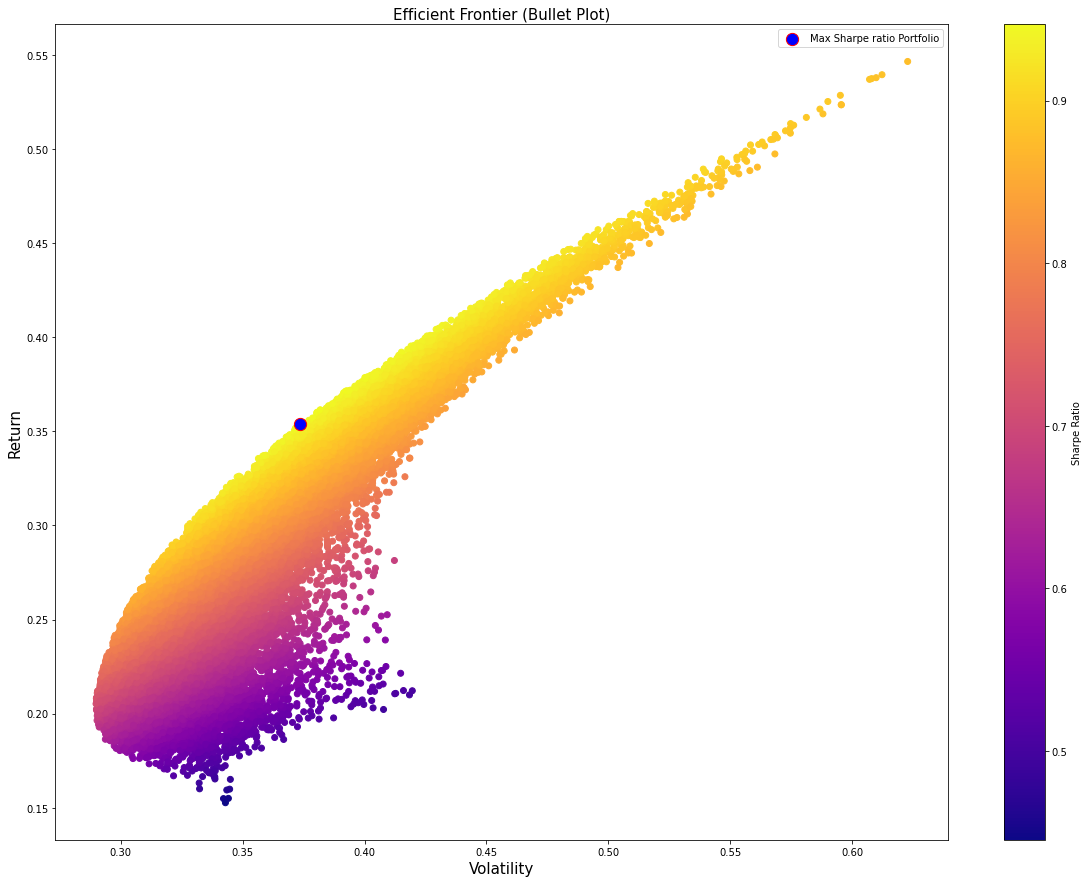

In [17]:
plt.figure(figsize=(20,15))
plt.scatter(port_volatility,port_return,c=port_sr, cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility', fontsize=15)
plt.ylabel('Return', fontsize=15)
plt.title('Efficient Frontier (Bullet Plot)', fontsize=15)
plt.scatter(max_sr_vol, max_sr_ret, c='blue', s=150, edgecolors='red', marker='o', label='Max \
Sharpe ratio Portfolio')
plt.legend();

In [18]:
for weight, stock in zip(port_weights[ind],stocks):
    print(f'{round(weight * 100, 2)} % of {stock} should be bought.')
    
# best portfolio return
print(f'\nMarkowitz optimal portfolio return is : {round(max_sr_ret * 100, 2)}% with volatility \
{max_sr_vol}')

0.04 % of AMZN should be bought.
0.52 % of TSLA should be bought.
60.84 % of META should be bought.
38.6 % of MSFT should be bought.

Markowitz optimal portfolio return is : 35.38% with volatility 0.3735835944993654


All we did above can be done using optimization, which we do next.

# SciPy to get the max of Sharpe Ration

In [18]:
from scipy import optimize

In [19]:
log_mean = log_ret.mean() * 252
cov = log_ret.cov() * 252

In [ ]:
import numpy as np
from scipy import optimize

# Assuming log_mean and cov are already defined:
# log_mean: expected log returns for the assets
# cov: covariance matrix of the asset returns

# Example (replace with your actual data)
log_mean = np.random.randn(1998)  # Replace with your actual log-mean returns
cov = np.random.randn(1998, 1998)  # Replace with your actual covariance matrix
cov = np.dot(cov, cov.T)  # To ensure it's positive semi-definite

# Some helper functions
def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = log_mean.dot(weights)
    vol = np.sqrt(weights.T.dot(cov.dot(weights)))
    sr = ret / vol
    return np.array([ret, vol, sr])

# Negate Sharpe ratio as we need to max it but scipy minimizes the given function
def neg_sr(weights):
    return get_ret_vol_sr(weights)[-1] * -1

# Check sum of weights constraint (sum of weights should be 1)
def check_sum(weights):
    return np.sum(weights) - 1

# Constraints for the optimization problem
cons = {'type': 'eq', 'fun': check_sum}

# Bounds on weights: each weight should be between 0 and 1 (based on the number of assets)
num_assets = len(log_mean)  # Number of assets, assumed to be 1998
bounds = tuple((0, 1) for _ in range(num_assets))

# Initial guess for the optimization to start with (e.g., equally weighted)
init_guess = [1.0 / num_assets for _ in range(num_assets)]  # Equal allocation initially

# Call the minimizer
opt_results = optimize.minimize(fun=neg_sr,          # The objective function (negative Sharpe ratio)
                                x0=init_guess,      # Initial guess for the optimization
                                method='SLSQP',     # Sequential Least Squares Quadratic Programming
                                bounds=bounds,      # Bounds on the weights
                                constraints=cons)   # Constraints (weights sum to 1)



In [34]:
import numpy as np
from scipy.optimize import minimize
from sklearn.decomposition import PCA

# Assuming log_ret is your log returns data (n_assets x n_days)
# log_ret = ...  # Load or generate your returns data here
# Example (replace with your actual data)
log_mean = np.random.randn(1998)  # Replace with your actual log-mean returns
cov = np.random.randn(1998, 1998)  # Replace with your actual covariance matrix
cov = np.dot(cov, cov.T)  # To ensure it's positive semi-definite

# Step 1: Apply PCA to reduce dimensionality (e.g., reduce to top 10 components)
pca = PCA(n_components=10)  # Reduce to top 10 components for optimization
log_ret_pca = pca.fit_transform(log_ret.T)  # Transpose if needed (n_assets x n_days)

# Get the new log returns (in terms of PCA components)
log_mean = log_ret_pca.mean(axis=0)  # Mean of the PCA components (expected returns)
cov = np.cov(log_ret_pca.T) * 252  # Covariance of the PCA components, annualized (multiply by 252)

# Step 2: Define helper functions for calculating portfolio return, volatility, and Sharpe ratio
def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = log_mean.dot(weights)  # Expected portfolio return
    vol = np.sqrt(weights.T.dot(cov.dot(weights)))  # Portfolio volatility
    sr = ret / vol  # Sharpe ratio
    return np.array([ret, vol, sr])

def neg_sr(weights):
    return -get_ret_vol_sr(weights)[-1]  # Negate Sharpe ratio to maximize it

# Step 3: Add constraints and bounds
def check_sum(weights):
    return np.sum(weights) - 1  # Weights must sum to 1

# Minimum weight constraint (ensure weights are not too small)
def min_weight_constraint(weights):
    return weights - 0.005  # Minimum weight of 0.5% for each asset

# Bounds on weights: each weight should be between 0 and 1
bounds = tuple((0, 1) for _ in range(len(log_mean)))

# Step 4: Regularize the optimization to promote diversification (L2 regularization)
def regularized_neg_sr(weights):
    neg_sr_value = neg_sr(weights)
    regularization_penalty = 0.001 * np.sum(np.square(weights))  # Small penalty for large weights
    return neg_sr_value + regularization_penalty

# Step 5: Initial guess (equal distribution among assets)
init_guess = [1.0 / len(log_mean) for _ in range(len(log_mean))]

# Step 6: Optimization constraints
cons = [
    {'type': 'eq', 'fun': check_sum},  # Weights must sum to 1
    {'type': 'ineq', 'fun': min_weight_constraint}  # Minimum weight constraint
]

# Step 7: Call the optimizer
result = minimize(fun=regularized_neg_sr,  # The objective function (regularized Sharpe ratio)
                  x0=init_guess,  # Initial guess for the optimization
                  method='COBYLA',  # Optimizer method (COBYLA is good for large-scale problems)
                  bounds=bounds,  # Bounds on the weights
                  constraints=cons)  # Constraints for the optimization

# Step 8: Extract results
optimal_weights = result.x
expected_return, expected_volatility, sharpe_ratio = get_ret_vol_sr(optimal_weights)

# Step 9: Print the optimal portfolio with weights and metrics
print("Optimal Portfolio Allocation:")
for i, weight in enumerate(optimal_weights):
    if weight > 0.005:  # Filter out stocks with very small weights (less than 0.5%)
        print(f"Stock {i+1} has weight {weight * 100:.2f} %")  # Print weight as a percentage

# Print portfolio metrics
print("\nPortfolio Metrics:")
print("Expected return:", expected_return)
print("Expected volatility:", expected_volatility)
print("Sharpe Ratio:", sharpe_ratio)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [25]:
from scipy.optimize import minimize
import numpy as np

# Assuming 'log_mean' is your array of expected returns and 'cov' is the covariance matrix
log_mean = np.random.randn(5)  # Example, replace with actual data
cov = np.random.randn(5, 5)    # Example, replace with actual data
cov = np.dot(cov, cov.T)       # To ensure covariance is positive semi-definite

# Helper function to calculate return, volatility, and Sharpe ratio
def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = log_mean.dot(weights)  # Expected portfolio return
    vol = np.sqrt(weights.T.dot(cov.dot(weights)))  # Portfolio volatility
    sr = ret / vol  # Sharpe ratio
    return np.array([ret, vol, sr])

# Negate Sharpe ratio because we want to maximize it
def neg_sr(weights):
    return -get_ret_vol_sr(weights)[-1]

# Constraint to ensure the sum of weights is equal to 1
def check_sum(weights):
    return np.sum(weights) - 1  # We want this to be 0 (i.e., weights sum to 1)

# Bounds on weights: each weight should be between 0 and 1
bounds = tuple((0, 1) for _ in range(len(log_mean)))

# Initial guess for the optimization (e.g., equally weighted)
init_guess = [1.0 / len(log_mean) for _ in range(len(log_mean))]

# Constraints for the optimization problem (equality constraint: sum of weights = 1)
cons = {'type': 'eq', 'fun': check_sum}

# Call the minimizer using 'trust-constr' or 'Powell' method for potentially faster optimization
result = minimize(fun=neg_sr,           # The objective function (negative Sharpe ratio)
                  x0=init_guess,       # Initial guess for the optimization
                  method='trust-constr',  # Using 'trust-constr' for faster optimization
                  bounds=bounds,       # Bounds on the weights (each between 0 and 1)
                  constraints=cons)    # Constraints (weights sum to 1)

# Extract the results
optimal_weights = result.x
expected_return, expected_volatility, sharpe_ratio = get_ret_vol_sr(optimal_weights)

# Print the results
print("Optimal weights:", optimal_weights)
print("Expected return:", expected_return)
print("Expected volatility:", expected_volatility)
print("Sharpe Ratio:", sharpe_ratio)


Optimal weights: [3.96341268e-01 3.35917190e-07 3.64115707e-07 6.03657757e-01
 2.75368286e-07]
Expected return: 0.39947474897767166
Expected volatility: 0.7995919880829773
Sharpe Ratio: 0.4995982387660147


/opt/conda/lib/python3.7/site-packages/scipy/optimize/_hessian_update_strategy.py:186: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  'approximations.', UserWarning)


In [22]:
optimal_weights = optimal_weights.x
# optimal_weights
for st, i in zip(df['Name'],optimal_weights):
    print(f'Stock {st} has weight {np.round(i*100,2)} %')

AttributeError: 'numpy.ndarray' object has no attribute 'x'

In [28]:
# Debugging: Check if weights sum to 1 and print the weights
print("Sum of weights:", np.sum(optimal_weights))

# Check the first few and last few weights to see if they are too small
print("Optimal weights (first 10):", optimal_weights[:10])
print("Optimal weights (last 10):", optimal_weights[-10:])


Sum of weights: 1.0
Optimal weights (first 10): [3.96341268e-01 3.35917190e-07 3.64115707e-07 6.03657757e-01
 2.75368286e-07]
Optimal weights (last 10): [3.96341268e-01 3.35917190e-07 3.64115707e-07 6.03657757e-01
 2.75368286e-07]


In [29]:
from scipy.optimize import minimize
import numpy as np

# Assuming log_mean and cov are your expected returns and covariance matrix

# Helper function to calculate return, volatility, and Sharpe ratio
def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = log_mean.dot(weights)  # Expected portfolio return
    vol = np.sqrt(weights.T.dot(cov.dot(weights)))  # Portfolio volatility
    sr = ret / vol  # Sharpe ratio
    return np.array([ret, vol, sr])

# Negate Sharpe ratio because we want to maximize it
def neg_sr(weights):
    return -get_ret_vol_sr(weights)[-1]

# Constraint to ensure the sum of weights is equal to 1
def check_sum(weights):
    return np.sum(weights) - 1  # We want this to be 0 (i.e., weights sum to 1)

# Add a minimum weight constraint (e.g., each asset gets at least 1% weight)
def min_weight_constraint(weights):
    return weights - 0.01  # Minimum weight constraint (1%)

# Bounds on weights: each weight should be between 0 and 1
bounds = tuple((0, 1) for _ in range(len(log_mean)))

# Initial guess for the optimization (e.g., equally weighted)
init_guess = [1.0 / len(log_mean) for _ in range(len(log_mean))]

# Constraints for the optimization problem (equality constraint: sum of weights = 1, and min weight constraint)
cons = [
    {'type': 'eq', 'fun': check_sum},  # Weights sum to 1
    {'type': 'ineq', 'fun': min_weight_constraint}  # Min weight constraint
]

# Regularized Sharpe ratio objective
def regularized_neg_sr(weights):
    neg_sr_value = neg_sr(weights)
    # L2 regularization to penalize concentrated portfolios
    regularization_penalty = 0.001 * np.sum(np.square(weights))
    return neg_sr_value + regularization_penalty

# Call the minimizer using the regularized function
result = minimize(fun=regularized_neg_sr,
                  x0=init_guess,
                  method='SLSQP',
                  bounds=bounds,
                  constraints=cons)

# Extract the results
optimal_weights = result.x
expected_return, expected_volatility, sharpe_ratio = get_ret_vol_sr(optimal_weights)

# Print the results
print("Optimal weights:", optimal_weights)
print("Expected return:", expected_return)
print("Expected volatility:", expected_volatility)
print("Sharpe Ratio:", sharpe_ratio)


Optimal weights: [0.36337852 0.01       0.01       0.60662148 0.01      ]
Expected return: 0.3890814673336594
Expected volatility: 0.8175618015822227
Sharpe Ratio: 0.4759046552574646


In [31]:
import numpy as np
from scipy.optimize import minimize
from sklearn.decomposition import PCA

# Assuming log_ret is your log returns data (n_assets x n_days)
# log_ret = ...  # Load or generate your returns data here

# Step 1: Apply PCA to reduce dimensionality (e.g., reduce to top 10 components)
pca = PCA(n_components=10)  # Reduce to top 10 components for optimization
log_ret_pca = pca.fit_transform(log_ret.T)  # Transpose if needed (n_assets x n_days)

# Get the new log returns (in terms of PCA components)
log_mean = log_ret_pca.mean(axis=0)  # Mean of the PCA components (expected returns)
cov = np.cov(log_ret_pca.T) * 252  # Covariance of the PCA components, annualized (multiply by 252)

# Step 2: Define helper functions for calculating portfolio return, volatility, and Sharpe ratio
def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = log_mean.dot(weights)  # Expected portfolio return
    vol = np.sqrt(weights.T.dot(cov.dot(weights)))  # Portfolio volatility
    sr = ret / vol  # Sharpe ratio
    return np.array([ret, vol, sr])

def neg_sr(weights):
    return -get_ret_vol_sr(weights)[-1]  # Negate Sharpe ratio to maximize it

# Step 3: Add constraints and bounds
def check_sum(weights):
    return np.sum(weights) - 1  # Weights must sum to 1

# Minimum weight constraint (ensure weights are not too small)
def min_weight_constraint(weights):
    return weights - 0.005  # Minimum weight of 0.5% for each asset

# Bounds on weights: each weight should be between 0 and 1
bounds = tuple((0, 1) for _ in range(len(log_mean)))

# Step 4: Regularize the optimization to promote diversification (L2 regularization)
def regularized_neg_sr(weights):
    neg_sr_value = neg_sr(weights)
    regularization_penalty = 0.001 * np.sum(np.square(weights))  # Small penalty for large weights
    return neg_sr_value + regularization_penalty

# Step 5: Initial guess (equal distribution among assets)
init_guess = [1.0 / len(log_mean) for _ in range(len(log_mean))]

# Step 6: Optimization constraints
cons = [
    {'type': 'eq', 'fun': check_sum},  # Weights must sum to 1
    {'type': 'ineq', 'fun': min_weight_constraint}  # Minimum weight constraint
]

# Step 7: Call the optimizer
result = minimize(fun=regularized_neg_sr,  # The objective function (regularized Sharpe ratio)
                  x0=init_guess,  # Initial guess for the optimization
                  method='COBYLA',  # Optimizer method (COBYLA is good for large-scale problems)
                  bounds=bounds,  # Bounds on the weights
                  constraints=cons)  # Constraints for the optimization

# Step 8: Extract results
optimal_weights = result.x
expected_return, expected_volatility, sharpe_ratio = get_ret_vol_sr(optimal_weights)

# Step 9: Print the optimal portfolio with weights and metrics
print("Optimal Portfolio Allocation:")
for i, weight in enumerate(optimal_weights):
    if weight > 0.005:  # Filter out stocks with very small weights (less than 0.5%)
        print(f"Stock {i+1} has weight {weight * 100:.2f} %")  # Print weight as a percentage

# Print portfolio metrics
print("\nPortfolio Metrics:")
print("Expected return:", expected_return)
print("Expected volatility:", expected_volatility)
print("Sharpe Ratio:", sharpe_ratio)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [30]:
# Assuming 'log_ret' is your DataFrame and the column names are the stock names
stock_names = log_ret.columns  # Get the stock names (column names)
print(stock_names)
# Extract the optimal portfolio weights
optimal_weights = result.x

# Get expected return, volatility, and Sharpe ratio
expected_return, expected_volatility, sharpe_ratio = get_ret_vol_sr(optimal_weights)

# Create a dictionary or list to display stock names with their respective weights
portfolio = dict(zip(stock_names, optimal_weights))

# Print the optimal portfolio with stock names and their respective weights in percentage format
print("Optimal Portfolio Allocation:")
for stock, weight in portfolio.items():
    print(f"Stock {stock} has weight {weight * 100:.2f} %")  # Display the stock name and weight as a percentage with 2 decimal places

# Print expected return, volatility, and Sharpe ratio
print("\nPortfolio Metrics:")
print("Expected return:", expected_return)
print("Expected volatility:", expected_volatility)
print("Sharpe Ratio:", sharpe_ratio)


Index(['3-D Matrix,Ltd.', 'A&D Company,Limited', 'ABC-MART,INC.',
       'ABHOTEL CO.,LTD.', 'ACCESS CO.,LTD.', 'ACOM CO.,LTD.', 'ACSL Ltd.',
       'ADEKA CORPORATION', 'ADTEC PLASMA TECHNOLOGY CO.,LTD.',
       'ADVAN GROUP CO.,LTD.',
       ...
       'giftee Inc.', 'gremz,Inc.', 'gumi Inc.', 'i-mobile Co.,Ltd.',
       'i3 Systems,Inc.', 'ipet Holdings,Inc.', 'istyle Inc.', 'kaonavi,inc.',
       'mixi,Inc.', 'transcosmos inc.'],
      dtype='object', name='Name', length=1998)
Optimal Portfolio Allocation:
Stock 3-D Matrix,Ltd. has weight 36.34 %
Stock A&D Company,Limited has weight 1.00 %
Stock ABC-MART,INC. has weight 1.00 %
Stock ABHOTEL CO.,LTD. has weight 60.66 %
Stock ACCESS CO.,LTD. has weight 1.00 %

Portfolio Metrics:
Expected return: 0.3890814673336594
Expected volatility: 0.8175618015822227
Sharpe Ratio: 0.4759046552574646


In [24]:
for stock, weight in portfolio.items():
    if weight * 100 > 5:  # Filter stocks with weights greater than 5%
        print(f"Stock {stock} has weight {weight * 100:.2f} %")  # Display t

Stock 3-D Matrix,Ltd. has weight 33.33 %
Stock A&D Company,Limited has weight 8.23 %
Stock ABHOTEL CO.,LTD. has weight 21.20 %
Stock ACCESS CO.,LTD. has weight 10.87 %
Stock ADEKA CORPORATION has weight 5.12 %
Stock ADTEC PLASMA TECHNOLOGY CO.,LTD. has weight 23.08 %
Stock ADVAN GROUP CO.,LTD. has weight 19.97 %
Stock AEON DELIGHT CO.,LTD. has weight 22.52 %
Stock AEON KYUSHU CO.,LTD. has weight 7.42 %
Stock AEON Mall Co.,Ltd. has weight 31.04 %
Stock AGS Corporation has weight 33.37 %
Stock AICHI STEEL CORPORATION has weight 31.93 %
Stock AIFUL CORPORATION has weight 33.32 %
Stock AIN HOLDINGS INC. has weight 17.85 %
Stock AISAN INDUSTRY CO.,LTD. has weight 32.86 %
Stock AKEBONO BRAKE INDUSTRY CO.,LTD. has weight 33.46 %
Stock ALBIS Co.,Ltd. has weight 9.74 %
Stock ALCONIX CORPORATION has weight 33.34 %
Stock ALPS LOGISTICS CO.,LTD. has weight 26.84 %
Stock AMADA CO.,LTD. has weight 33.48 %
Stock AMIYAKI TEI CO.,LTD. has weight 9.11 %
Stock ANEST IWATA Corporation has weight 24.84 %
S

In [23]:
mc_weights = port_weights[ind]
for st, i in zip(stocks,mc_weights):
    print(f'Stock {st} has weight {np.round(i*100,2)} %')

Stock AMZN has weight 0.04 %
Stock TSLA has weight 0.52 %
Stock META has weight 60.84 %
Stock MSFT has weight 38.6 %


In [24]:
# Comparing two results we see that we get very close results
(optimal_weights - mc_weights)

array([-0.000391  , -0.00520103, -0.03160345,  0.03719548])

In [25]:
get_ret_vol_sr(optimal_weights), get_ret_vol_sr(mc_weights)

print('For a given portfolio we have: (Using SciPy optimizer)\n \n')
for i, j in enumerate('Return Volatility SharpeRatio'.split()):
    print(f'{j} is : {get_ret_vol_sr(optimal_weights)[i]}\n')
    
print('For a given portfolio we have: (Using Monte Carlo)\n \n')
for i, j in enumerate('Return Volatility SharpeRatio'.split()):
    print(f'{j} is : {get_ret_vol_sr(mc_weights)[i]}\n')

For a given portfolio we have: (Using SciPy optimizer)
 

Return is : 0.36713094284381564

Volatility is : 0.3872702562310578

SharpeRatio is : 0.94799674629485

For a given portfolio we have: (Using Monte Carlo)
 

Return is : 0.3537599769995994

Volatility is : 0.3735835944993654

SharpeRatio is : 0.9469365952047991



So MC and Optimizer gives very close results. MC is good, but if we have many assets, since MC computationally heavy, SciPy is going to be a saviour!!!

# Frontier curve

Best return for given volatility or vice versa.

In [26]:
frontier_y = np.linspace(port_return.min(), port_return.max(), 100)
frontier_vol = []

def minimize_vol(weights):
    return get_ret_vol_sr(weights)[1]

for possible_ret in frontier_y:
    cons = ({'type':'eq','fun':check_sum},
            {'type':'eq','fun':lambda w:get_ret_vol_sr(w)[0] - possible_ret})
    result = optimize.minimize(minimize_vol, init_guess, method='SLSQP', constraints=cons, bounds=bounds)
    frontier_vol.append(result['fun'])    

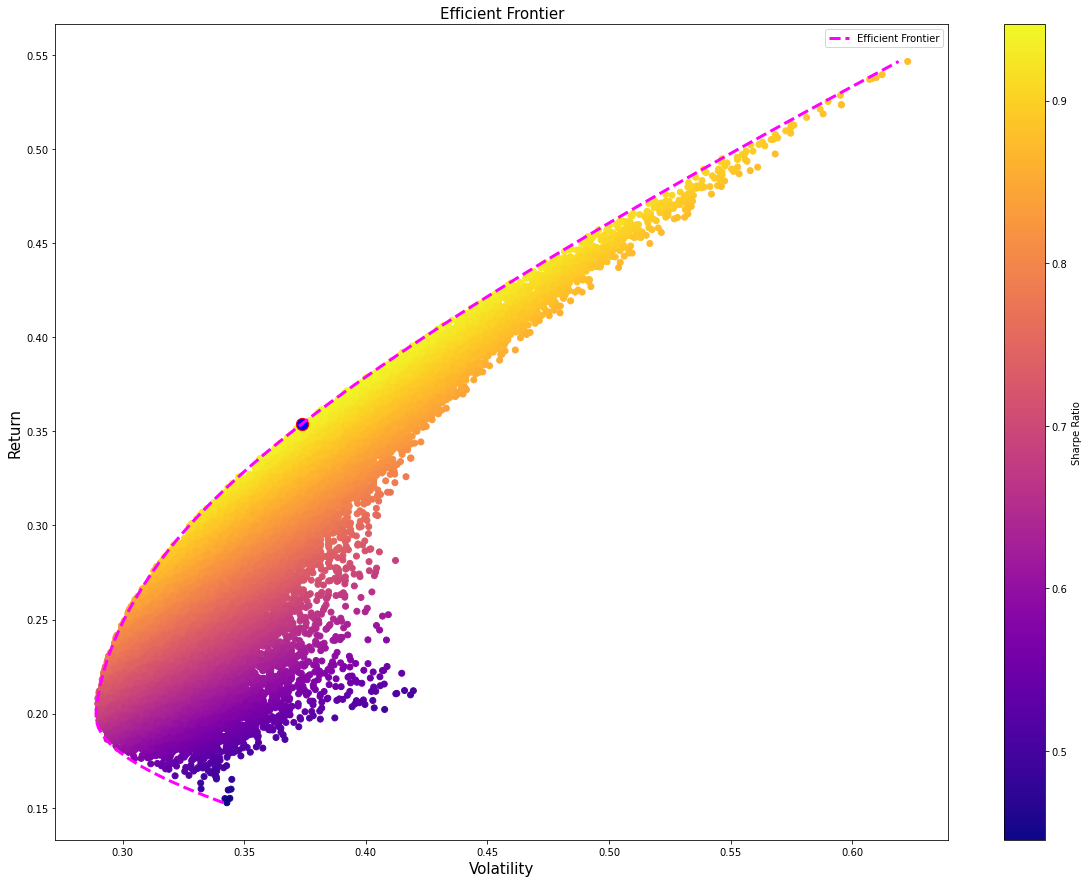

In [27]:
plt.figure(figsize=(20,15))
plt.scatter(port_volatility,port_return,c=port_sr, cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility', fontsize=15)
plt.ylabel('Return', fontsize=15)
plt.title('Efficient Frontier', fontsize=15)
plt.scatter(max_sr_vol, max_sr_ret, c='blue', s=150, edgecolors='red', marker='o')

plt.plot(frontier_vol, frontier_y, c='magenta', ls='--', lw=3, label='Efficient Frontier')
plt.legend();

It is common practice to choose the portfolio with max sharpe ratio. Thought one can always make a choice as per one's taste. Efficient frontier gives us max profit for given amount of risk. So anything below the given efficient frontier will be a bad choice (of course, we are assuming above the risk free rate).

CAPM, Beta and Sharpe ratio are tools to evaluate the stocks too. One may see,
https://www.kaggle.com/code/bhavinmoriya/beta-of-a-stock-capm-from-scratch